In [1]:
import random
from argparse import ArgumentParser
from decimal import Decimal
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np
from preprocess_data import create_balance_df
from analyze_data import *
import os.path

Load data files

In [2]:
file_balances = "../data/uniswap-balances.csv"
file_original = "../data/outputUniswap_fromBlock_10861674_toBlock_19955500.csv"
timelock_address = "0x0000000000000000000000001a9c8182c09f50c8318d769245bea52c32be35bc"

Initialize data frames

In [3]:
df_balances = pd.read_csv(file_balances)
df_balances["balance"] = df_balances["balance"].apply(Decimal)
df_balances["amount_in"] = df_balances["amount_in"].apply(Decimal)
df_balances["amount_out"] = df_balances["amount_out"].apply(Decimal)

/tmp/ipykernel_55074/3789912109.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_balances = pd.read_csv(file_balances)


Preprocess data

In [6]:
# remove negative balances
non_negative_df = clean_data(df_balances)

# remove zero balances
only_positive_df = remove_zero_balances(non_negative_df)
only_positive_df_removed_timelockAddress = remove_address(only_positive_df, timelock_address)

## Metrics
### Gini index

In [8]:
gini_index = compute_gini_index(only_positive_df_removed_timelockAddress)
print("gini index: ", gini_index)

gini index:  0.9952059161147626132523910141


### Herfindahl hirschman index:

In [ ]:
# TODO

## Charts

### Timeline
Gini index in timeline:

In [4]:
block_step_size = 500_000
gini_timeline_file = "../data/gini_timeline_step_size_" + str(block_step_size) + ".csv"

if os.path.isfile(gini_timeline_file):
    # file already exists
    gini_indices = pd.read_csv(gini_timeline_file)
    
else:
    gini_indices = create_and_export_gini_timeline(file_original, block_step_size, gini_timeline_file)

print(gini_indices)

[Gini][Timeline][Block 11361674]: Calculating balances ...
[Gini][Timeline][Block 11361674]: Calculating gini ...
[Gini][Timeline][Block 11361674]: Done calculating: 0.9941574844891292153653906531
[Gini][Timeline][Block 11861674]: Calculating balances ...
[Gini][Timeline][Block 11861674]: Calculating gini ...
[Gini][Timeline][Block 11861674]: Done calculating: 0.9951689591791576983410697386
[Gini][Timeline][Block 12361674]: Calculating balances ...
[Gini][Timeline][Block 12361674]: Calculating gini ...
[Gini][Timeline][Block 12361674]: Done calculating: 0.9954499309915268909693469884
[Gini][Timeline][Block 12861674]: Calculating balances ...
[Gini][Timeline][Block 12861674]: Calculating gini ...
[Gini][Timeline][Block 12861674]: Done calculating: 0.9954728567035836097060281826
[Gini][Timeline][Block 13361674]: Calculating balances ...
[Gini][Timeline][Block 13361674]: Calculating gini ...
[Gini][Timeline][Block 13361674]: Done calculating: 0.9952463101034816176603972134
[Gini][Timeline

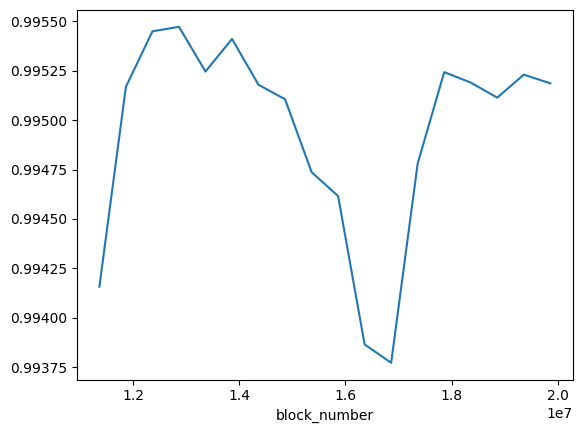

In [5]:
gini_indices = gini_indices["gini_index"].apply(float)
create_timeline_plot(gini_indices)

### Pie Chart
Balances distribution pie chart:

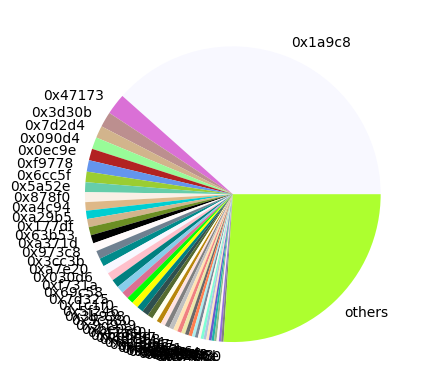

In [20]:
# all addresses with positive balance
create_pie_chart(
    merge_others_at_cut_off_value(only_positive_df, 50), 
    "../data/uniswap_pie_chart.png")

The timelock address holds a huge amount of the tokens.

In [21]:
# all addresses with positive balance, except the timelock address
create_pie_chart(
    merge_others_at_cut_off_value(only_positive_df_removed_timelockAddress, 50), 
    "../data/uniswap_pie_chart.png")

NameError: name 'only_positive_df_removed_timelockAddress' is not defined